<a href="https://colab.research.google.com/github/NitheeshMS/Datacleaning_with_PANDAS/blob/main/week3_dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
#Reading the file
data = pd.read_csv('/content/drive/MyDrive/Data analyst internship/week3_cleaning.csv')
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display columns with missing values (if any)
print(missing_values[missing_values > 0])


Age       7
Rating    1
dtype: int64


In [3]:
data['Age'] = data['Age'].fillna(round(data['Age'].mean())).astype(int)

In [4]:
# Impute missing values in the 'Rating' column with the mean
data['Rating'].fillna(data['Rating'].mean(), inplace=True)

In [5]:
missing_values = data.isnull().sum()

# Display columns with missing values (if any)
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [6]:
def clean_salary(salary_string):
    cleaned_salary = re.sub(r'[\$Kk]', '', str(salary_string))
    return cleaned_salary

# Apply the function to the 'Salary' column
data['Salary'] = data['Salary'].apply(clean_salary)

In [7]:
# Function to add three zeros to each number in salary strings
def format_salary(salary_string):
    # Extract numerical values from the cleaned string
    numbers = [int(s) for s in re.findall(r'\b\d+\b', str(salary_string))]

    # Check if there are two numerical values (lower and upper bounds)
    if len(numbers) == 2:
        # Add three zeros to each number to represent in thousands
        formatted_salary = f"{numbers[0]*1000}-{numbers[1]*1000}"
        return formatted_salary
    else:
        return str(salary_string)

# Apply the function to the 'Salary' column
data['Salary'] = data['Salary'].apply(format_salary)

In [9]:
# Convert the 'Rating' column to numeric, treating errors as NaN
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

# Calculate the mean of non-negative values in the 'Rating' column
rating_mean = data[data['Rating'] >= 0]['Rating'].mean()



In [13]:
# Replace -1 with the rounded mean
data['Rating'] = data['Rating'].replace(-1, int(round(rating_mean)))

data['Rating'] = data['Rating'].round(1)

In [16]:
print("Unique values in 'Location' column:")
print(data['Location'].unique())

Unique values in 'Location' column:
['India,In' 'New York,Ny' 'India In' 'Australia Aus']


In [17]:
# Create a mapping to standardize location entries
location_mapping = {
    'India,In': 'India',
    'New York,Ny': 'New York',
    'India In': 'India',
    'Australia Aus': 'Australia'
}

# Apply the mapping to standardize 'Location' entries
data['Location'] = data['Location'].replace(location_mapping)


In [18]:
print("Unique values in 'Location' column:")
print(data['Location'].unique())

Unique values in 'Location' column:
['India' 'New York' 'Australia']


In [21]:

# Display the updated 'Established' column
print("Updated 'Established' column:")
print(data['Established'])



Updated 'Established' column:
0     1999
1     2002
2       -1
3     1988
4     2002
5     1999
6       -1
7       -1
8       -1
9       -1
10    2008
11    2009
12    1999
13    2019
14    2020
15    1999
16    1984
17    1943
18    1954
19    1955
20    1944
21    1946
22    1988
23    1999
24    1987
25    1980
26    1934
27    1935
28    1932
Name: Established, dtype: int64


In [24]:
# Replace negative values with NaN in the 'Established' column
data['Established'] = data['Established'].replace(-1, np.nan)

# Display the updated 'Established' column
print("Updated 'Established' column:")
print(data['Established'])


Updated 'Established' column:
0     1999.0
1     2002.0
2        NaN
3     1988.0
4     2002.0
5     1999.0
6        NaN
7        NaN
8        NaN
9        NaN
10    2008.0
11    2009.0
12    1999.0
13    2019.0
14    2020.0
15    1999.0
16    1984.0
17    1943.0
18    1954.0
19    1955.0
20    1944.0
21    1946.0
22    1988.0
23    1999.0
24    1987.0
25    1980.0
26    1934.0
27    1935.0
28    1932.0
Name: Established, dtype: float64


In [26]:
# Display unique values in the 'Easy Apply' column
unique_values_easy_apply = data['Easy Apply'].unique()
print("Unique values in 'Easy Apply' column:", unique_values_easy_apply)


Unique values in 'Easy Apply' column: ['TRUE' '-1']


In [ ]:
# Convert 'TRUE' to True, '-1' to False, and handle other values
data['Easy Apply'] = data['Easy Apply'].apply(lambda x: True if x == 'TRUE' else (False if x == '-1' else None))

# Display the updated 'Easy Apply' column
print("Updated 'Easy Apply' column:")


In [29]:
# Display unique values in the 'Rating' column
unique_values_rating = data['Rating'].unique()
print("Unique values in 'Rating' column:", unique_values_rating)


Unique values in 'Rating' column: [5.4 3.5 4.  4.4 6.4 1.4 0.  7.7 6.7 3.  4.5 5.3 3.3 5.7 5.  7.8 2.4 3.4]


In [34]:
# Replace '0' with the mean of non-zero ratings
non_zero_ratings = data['Rating'][data['Rating'] > 0]
mean_rating = non_zero_ratings.mean()
data['Rating'] = data['Rating'].replace(0, mean_rating)

# round off
data['Rating'] = data['Rating'].round(1)



In [35]:
# Display unique values in the 'Rating' column
unique_values_rating_updated = data['Rating'].unique()
print("Unique values in 'Rating' column after updates:", unique_values_rating_updated)


Unique values in 'Rating' column after updates: [5.4 3.5 4.  4.4 6.4 1.4 4.7 7.7 6.7 3.  4.5 5.3 3.3 5.7 5.  7.8 2.4 3.4]


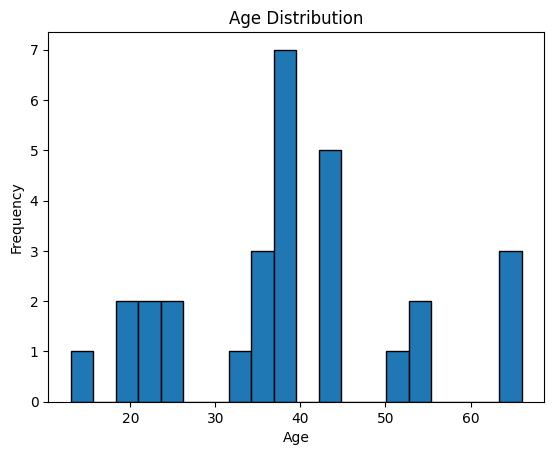

In [36]:
import matplotlib.pyplot as plt

# Plot histogram for the 'Age' column
plt.hist(data['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [39]:
# Assuming 'data' is your DataFrame
data['Location'] = data['Location'].str.replace('[^a-zA-Z\s]', '')

# Display unique values in the 'Location' column after cleaning
unique_locations = data['Location'].unique()
print("Unique values in 'Location' column after cleaning:", unique_locations)


Unique values in 'Location' column after cleaning: ['India' 'New York' 'Australia']


<ipython-input-39-e5dbd64e8633>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Location'] = data['Location'].str.replace('[^a-zA-Z\s]', '')


In [ ]:
import pandas as pd
from datetime import datetime

# Assuming 'data' is your DataFrame
# Get the current year
current_year = datetime.now().year

# Calculate the expected establishment year based on 'Age'
data['Expected_Established'] = current_year - data['Age']

# Check for inconsistencies between 'Established' and 'Expected_Established' columns
inconsistencies = data[data['Established'] != data['Expected_Established']]

# Display the rows with inconsistencies
print("Rows with inconsistencies between 'Established' and 'Age' columns:")
print(inconsistencies)





In [ ]:
# Replace 'Established' column with 'Expected_Established'
data['Established'] = data['Expected_Established']

# Drop the temporary column
data.drop('Expected_Established', axis=1, inplace=True)

# Display the updated DataFrame
print("Updated DataFrame:")
print(data)


In [60]:
data['Established'] = data['Established'].astype(int)
data['Age'] = data['Age'].astype(int)

In [63]:
print("Unique values in 'Location' column:")
print(data['Location'].unique())



Unique values in 'Location' column:
['India' 'New York' 'Australia']


In [ ]:


# Assuming 'data' is your DataFrame
data_encoded = pd.get_dummies(data)

# Display the first few rows of the encoded data
print(data_encoded.head())


In [68]:
# Assuming 'data' is your DataFrame
min_rating = data['Rating'].min()
max_rating = data['Rating'].max()

# Min-Max Normalization
data['Normalized_Rating'] = (data['Rating'] - min_rating) / (max_rating - min_rating)

# Display the updated DataFrame
print(data[['Rating', 'Normalized_Rating']])


    Rating  Normalized_Rating
0      5.4           0.625000
1      3.5           0.328125
2      4.0           0.406250
3      4.4           0.468750
4      6.4           0.781250
5      1.4           0.000000
6      4.7           0.515625
7      4.0           0.406250
8      5.4           0.625000
9      7.7           0.984375
10     5.4           0.625000
11     6.7           0.828125
12     4.7           0.515625
13     4.0           0.406250
14     4.0           0.406250
15     3.0           0.250000
16     4.5           0.484375
17     5.3           0.609375
18     6.7           0.828125
19     3.3           0.296875
20     5.7           0.671875
21     5.0           0.562500
22     7.8           1.000000
23     2.4           0.156250
24     4.0           0.406250
25     4.7           0.515625
26     3.5           0.328125
27     5.4           0.625000
28     3.4           0.312500


In [ ]:
data

In [75]:
# Clean up column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Print the cleaned column names
print(data.columns)


Index(['index', 'age', 'salary', 'rating', 'location', 'established',
       'easy_apply', 'normalized_rating'],
      dtype='object')


In [82]:
# Update the column name for "Salary"
data.rename(columns={'           salary': 'salary_in_$'}, inplace=True)

# Print the updated column names
print(data.columns)


Index(['index            ', 'age              ', 'salary_in_$      ',
       'rating           ', 'location         ', 'established      ',
       'easy_apply       ', 'normalized_rating'],
      dtype='object')


In [83]:
data

,index,age,salary_in_$,rating,location,established,easy_apply,normalized_rating
0,0,44,44000-99000,5.4,India,1979,True,0.625000
1,1,66,55000-66000,3.5,New York,1957,True,0.328125
2,2,39,77000-89000,4.0,New York,1984,False,0.406250
3,3,64,44000-99000,4.4,India,1959,False,0.468750
4,4,25,44000-99000,6.4,Australia,1998,False,0.781250
5,5,44,77000-89000,1.4,India,1979,True,0.000000
6,6,21,44000-99000,4.7,New York,2002,False,0.515625
7,7,44,44000-99000,4.0,Australia,1979,False,0.406250
8,8,35,44000-99000,5.4,New York,1988,False,0.625000
9,9,22,44000-99000,7.7,India,2001,True,0.984375


Age       7
Rating    1
dtype: int64
Series([], dtype: int64)


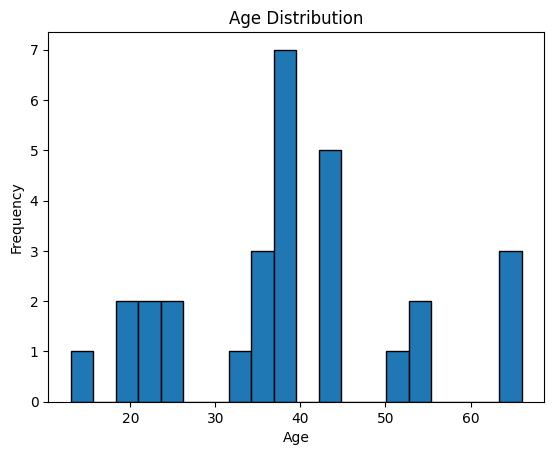

Unique values in 'Location' column after cleaning: ['India' 'New York' 'Australia']
   Index  Age  Rating  Established  Easy Apply  Salary_10000-49000  \
0      0   44     5.4         1979        True                   0   
1      1   66     3.5         1957        True                   0   
2      2   39     4.0         1984       False                   0   
3      3   64     4.4         1959       False                   0   
4      4   25     6.4         1998       False                   0   

   Salary_19000-40000  Salary_39000-88000  Salary_44000-99000  \
0                   0                   0                   1   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   1   
4                   0                   0                   1   

   Salary_55000-66000  Salary_77000-89000  Salary_88000-101000  \
0                   0                 

<ipython-input-90-c1f91c7233a3>:113: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Location'] = data['Location'].str.replace('[^a-zA-Z\s]', '')


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re

#Reading the file
data = pd.read_csv('/content/drive/MyDrive/Data analyst internship/week3_cleaning.csv')
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display columns with missing values (if any)
print(missing_values[missing_values > 0])

data['Age'] = data['Age'].fillna(round(data['Age'].mean())).astype(int)
# Impute missing values in the 'Rating' column with the mean
data['Rating'].fillna(data['Rating'].mean(), inplace=True)

missing_values = data.isnull().sum()

# Display columns with missing values (if any)
print(missing_values[missing_values > 0])

def clean_salary(salary_string):
    cleaned_salary = re.sub(r'[\$Kk]', '', str(salary_string))
    return cleaned_salary

# Apply the function to the 'Salary' column
data['Salary'] = data['Salary'].apply(clean_salary)


# Function to add three zeros to each number in salary strings
def format_salary(salary_string):
    # Extract numerical values from the cleaned string
    numbers = [int(s) for s in re.findall(r'\b\d+\b', str(salary_string))]

    # Check if there are two numerical values (lower and upper bounds)
    if len(numbers) == 2:
        # Add three zeros to each number to represent in thousands
        formatted_salary = f"{numbers[0]*1000}-{numbers[1]*1000}"
        return formatted_salary
    else:
        return str(salary_string)

# Apply the function to the 'Salary' column
data['Salary'] = data['Salary'].apply(format_salary)

# Convert the 'Rating' column to numeric, treating errors as NaN
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

# Calculate the mean of non-negative values in the 'Rating' column
rating_mean = data[data['Rating'] >= 0]['Rating'].mean()

# Replace -1 with the rounded mean
data['Rating'] = data['Rating'].replace(-1, int(round(rating_mean)))

data['Rating'] = data['Rating'].round(1)

# Create a mapping to standardize location entries
location_mapping = {
    'India,In': 'India',
    'New York,Ny': 'New York',
    'India In': 'India',
    'Australia Aus': 'Australia'
}

# Apply the mapping to standardize 'Location' entries
data['Location'] = data['Location'].replace(location_mapping)

# Replace negative values with NaN in the 'Established' column
data['Established'] = data['Established'].replace(-1, np.nan)

# Display the updated 'Established' column
# print("Updated 'Established' column:")
# print(data['Established'])

# Display unique values in the 'Easy Apply' column
unique_values_easy_apply = data['Easy Apply'].unique()
# print("Unique values in 'Easy Apply' column:", unique_values_easy_apply)

# Convert 'TRUE' to True, '-1' to False, and handle other values
data['Easy Apply'] = data['Easy Apply'].apply(lambda x: True if x == 'TRUE' else (False if x == '-1' else None))

# Display the updated 'Easy Apply' column
# print("Updated 'Easy Apply' column:")

# Display unique values in the 'Rating' column
unique_values_rating = data['Rating'].unique()
# print("Unique values in 'Rating' column:", unique_values_rating)

# Replace '0' with the mean of non-zero ratings
non_zero_ratings = data['Rating'][data['Rating'] > 0]
mean_rating = non_zero_ratings.mean()
data['Rating'] = data['Rating'].replace(0, mean_rating)

# round off
data['Rating'] = data['Rating'].round(1)

# Display unique values in the 'Rating' column
unique_values_rating_updated = data['Rating'].unique()
# print("Unique values in 'Rating' column after updates:", unique_values_rating_updated)


# Plot histogram for the 'Age' column
plt.hist(data['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# Assuming 'data' is your DataFrame
data['Location'] = data['Location'].str.replace('[^a-zA-Z\s]', '')

# Display unique values in the 'Location' column after cleaning
unique_locations = data['Location'].unique()
print("Unique values in 'Location' column after cleaning:", unique_locations)

# Assuming 'data' is your DataFrame
# Get the current year
current_year = datetime.now().year

# Calculate the expected establishment year based on 'Age'
data['Expected_Established'] = current_year - data['Age']

# Check for inconsistencies between 'Established' and 'Expected_Established' columns
inconsistencies = data[data['Established'] != data['Expected_Established']]

# Display the rows with inconsistencies
# print("Rows with inconsistencies between 'Established' and 'Age' columns:")
# print(inconsistencies)

# Replace 'Established' column with 'Expected_Established'
data['Established'] = data['Expected_Established']

# Drop the temporary column
data.drop('Expected_Established', axis=1, inplace=True)

# Display the updated DataFrame
# print("Updated DataFrame:")
# print(data)

#convert the column from flaot to int
data['Established'] = data['Established'].astype(int)
data['Age'] = data['Age'].astype(int)

# Assuming 'data' is your DataFrame
data_encoded = pd.get_dummies(data)

# Display the first few rows of the encoded data
print(data_encoded.head())

# Assuming 'data' is your DataFrame
min_rating = data['Rating'].min()
max_rating = data['Rating'].max()

# Min-Max Normalization
data['Normalized_Rating'] = (data['Rating'] - min_rating) / (max_rating - min_rating)

# Display the updated DataFrame
print(data[['Rating', 'Normalized_Rating']])

# Clean up column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Print the cleaned column names
print(data.columns)

# Update the column name for "Salary"
data.rename(columns={'salary': 'salary_in_$'}, inplace=True)

# Print the updated column names
print(data.columns)


In [91]:
data

,index,age,salary_in_$,rating,location,established,easy_apply,normalized_rating
0,0,44,44000-99000,5.4,India,1979,True,0.625000
1,1,66,55000-66000,3.5,New York,1957,True,0.328125
2,2,39,77000-89000,4.0,New York,1984,False,0.406250
3,3,64,44000-99000,4.4,India,1959,False,0.468750
4,4,25,44000-99000,6.4,Australia,1998,False,0.781250
5,5,44,77000-89000,1.4,India,1979,True,0.000000
6,6,21,44000-99000,4.7,New York,2002,False,0.515625
7,7,44,44000-99000,4.0,Australia,1979,False,0.406250
8,8,35,44000-99000,5.4,New York,1988,False,0.625000
9,9,22,44000-99000,7.7,India,2001,True,0.984375


In [92]:
data.to_csv('/content/drive/MyDrive/Data analyst internship/modified_dataset.csv', index=False)